In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
plt.style.use('paper_style.mplstyle')

In [2]:
loaded = np.load('data/plot_data.npz')
seps = loaded['seps']
acc_test = loaded['acc_test']
num_photons = loaded['num_photons']
kept = loaded['kept']
eff = loaded['eff']
resolutions = loaded['resolutions']

# grabbed from paper plot with WebPlotDigitizer -- need to get the actual data from Jingke
crlb = np.array([[19.364114406572302, 3.7954085783686544],
                 [20.887710576369116, 3.746678481542112],
                 [22.531185468212296, 3.689027523308208],
                 [24.303971311116563, 3.6228882909954114],
                 [26.285397956838136, 3.5049993722782435],
                 [28.37225050830114, 3.3811952283124067],
                 [31.146868984780124, 3.1947024679925407],
                 [33.89388112276204, 2.992235234431393],
                 [36.80228477955806, 2.796570012499765],
                 [40.05907028632072, 2.610886451129161],
                 [42.96267592143931, 2.4692347569096853],
                 [46.44489131578603, 2.3498995476028175],
                 [50.45243317836544, 2.237873462591957],
                 [54.51776686250494, 2.1438940799439012],
                 [58.62683684449089, 2.0655725411631405],
                 [63.15643517176488, 2.00111514112144],
                 [68.50059994682839, 1.9383351717163715],
                 [73.14789222476172, 1.8957281064753064],
                 [78.64387033649768, 1.8607782126426915],
                 [84.6642365059729, 1.8335671024593958],
                 [91.50636023345645, 1.7946539025776793],
                 [97.99370460483105, 1.7670391719058247],
                 [106.26239506312581, 1.7378270652363992],
                 [114.62327202926615, 1.7136683358447364],
                 [124.04982106624126, 1.6931241483910693],
                 [133.81023810738176, 1.6728262534254548],
                 [145.1011209607495, 1.6496422010565484],
                 [156.20893999416288, 1.6217420384269867],
                 [168.8329349522195, 1.5926664154468786],
                 [180.80234765173668, 1.5689704926347752],
                 [196.44617309531986, 1.5384534872197175],
                 [211.48457201395843, 1.5137373522549722],
                 [228.1244800999292, 1.488199831020556],
                 [246.0736399127412, 1.4624630560575276],
                 [265.4350652476258, 1.4371713702362192],
                 [286.3198751723074, 1.4117088583329556],
                 [308.2383092824322, 1.3902260991967612],
                 [333.14852800875303, 1.3633031747582283],
                 [358.65180142157686, 1.3408232520335825],
                 [387.6361766629241, 1.3154235466880237],
                 [417.3106028332132, 1.2931759763628676],
                 [451.0354776470804, 1.2670404973312541],
                 [484.9240975016057, 1.2389758487724176],
                 [524.1131436735416, 1.211637202471202],
                 [561.2701505078151, 1.1899141998894252],
                 [606.629088033305, 1.1639589073866685],
                 [655.65369923052, 1.1387659613245085],
                 [702.1362751347788, 1.117771521608949],
                 [758.8792809928386, 1.0948980099992112],
                 [818.5889863572327, 1.075267981926876],
                 [882.9967365938471, 1.0546261868348772],
                 [954.355945299556, 1.0327778964370944],
                 [1022.0150200811512, 1.0163608309481913],
                 [1110.4443175019246, 0.9945338670252696],
                 [1189.1692790728168, 0.9782189631338514],
                 [1285.271761964334, 0.9584488609461985],
                 [1389.1407482296308, 0.9395638482509561],
                 [1495.4826147921153, 0.9227982446220899],
                 [1616.339750047642, 0.904771558862542],
                 [1730.9301736307532, 0.8885502387602844],
                 [1870.8149573408227, 0.871793207474882],
                 [2018.0133493538153, 0.8554258854028332],
                 [2165.3545329853987, 0.8394381623131858],
                 [2352.7106640171924, 0.8222603239265991],
                 [2519.506111292613, 0.8083535526602631],
                 [2723.1195052951507, 0.7905849164312948],
                 [2943.187875942286, 0.7732068573605498],
                 [3151.8452113688068, 0.7593443129252735],
                 [3406.5609661673575, 0.7430369342674074],
                 [3681.8615249114064, 0.726328508014014],
                 [3942.8871364522524, 0.714413398639921],
                 [4261.530789834827, 0.6992516348069184],
                 [4596.834117037843, 0.6858281820434837],
                 [4932.4627093755835, 0.67318416306842],
                 [5359.241380309029, 0.6587271257708804],
                 [5739.184854343896, 0.6475861680979128],
                 [6202.995956751348, 0.6349356971823431],
                 [6704.289862758269, 0.6219962759901133],
                 [7179.59056310595, 0.6117926923816922],
                 [7800.800757466755, 0.5992732758628295],
                 [8206.601194689289, 0.5911205746531089]])

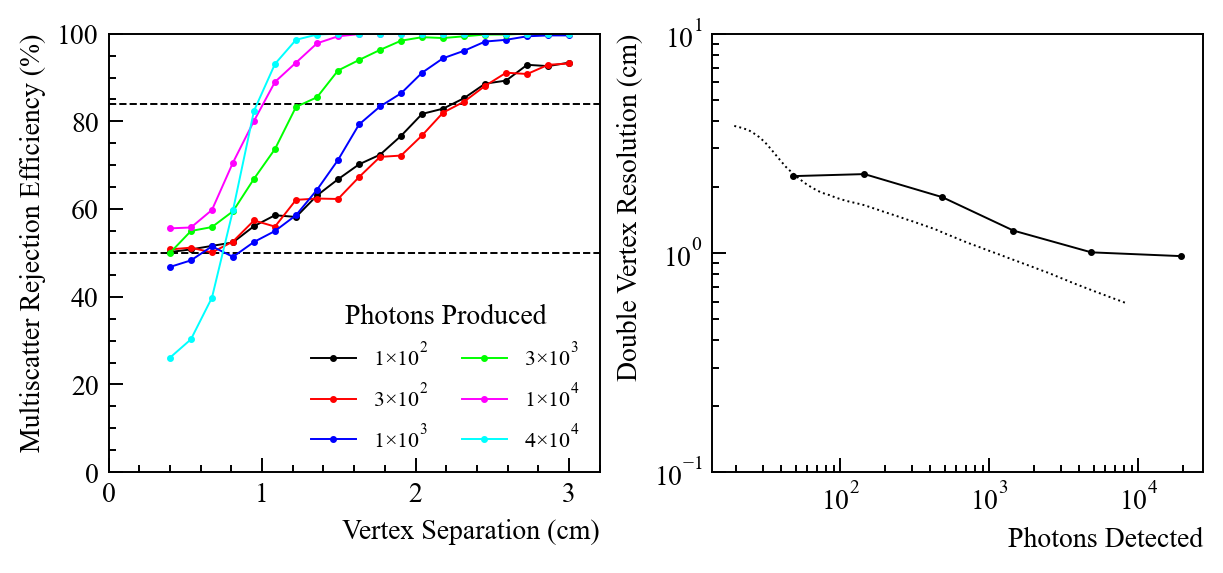

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(6, 2.75), layout='constrained')
[ax[0].axhline(t, color='k', ls='--') for t in [50, 84]]#, label='Single-site accepted')
ax[0].plot(seps/10., acc_test/1000*1e2, marker='.', label=['{:.0f}$\\times10^{:.0f}$'.format(n/10**np.floor(np.log10(n)), np.floor(np.log10(n))) for n in num_photons])
ax[0].set_xlabel('Vertex Separation (cm)')
ax[0].set_ylabel('Multiscatter Rejection Efficiency (%)')
ax[0].set_xlim([0, 3.2])
ax[0].set_ylim([0, 100])
ax[0].legend(title='Photons Produced', ncol=2, fontsize=8, handlelength=2, columnspacing=1.5)

# [ax[0].axhline(k/1000*1e2, color='C1') for k in kept]#, label='Single-site accepted')
ind = np.argmin(np.abs(np.interp(np.linspace(0, np.amax(seps), 1000), seps, acc_test[:,-3]/1000*1e2) - 84.))
# ax[0].axvline(np.linspace(0, np.amax(seps), 1000)[ind], ls='--', color='C2')
# ax[0].axhline(np.interp(np.linspace(0, np.amax(seps), 1000)[ind], seps, acc_test[:,-3]/1000*1e2), ls='--', color='C3')
ax[1].loglog(crlb[:, 0], crlb[:, 1], ls=':', color='C0')
ax[1].loglog(np.array(num_photons)*eff, resolutions/10., marker='.')
# ax[1].set_xlim([1e1, 1e4])
ax[1].set_ylim([1e-1, 1e1])
ax[1].set_ylabel('Double Vertex Resolution (cm)')
ax[1].set_xlabel('Photons Detected')

fig.savefig('figures/CNN_Performance.pdf')

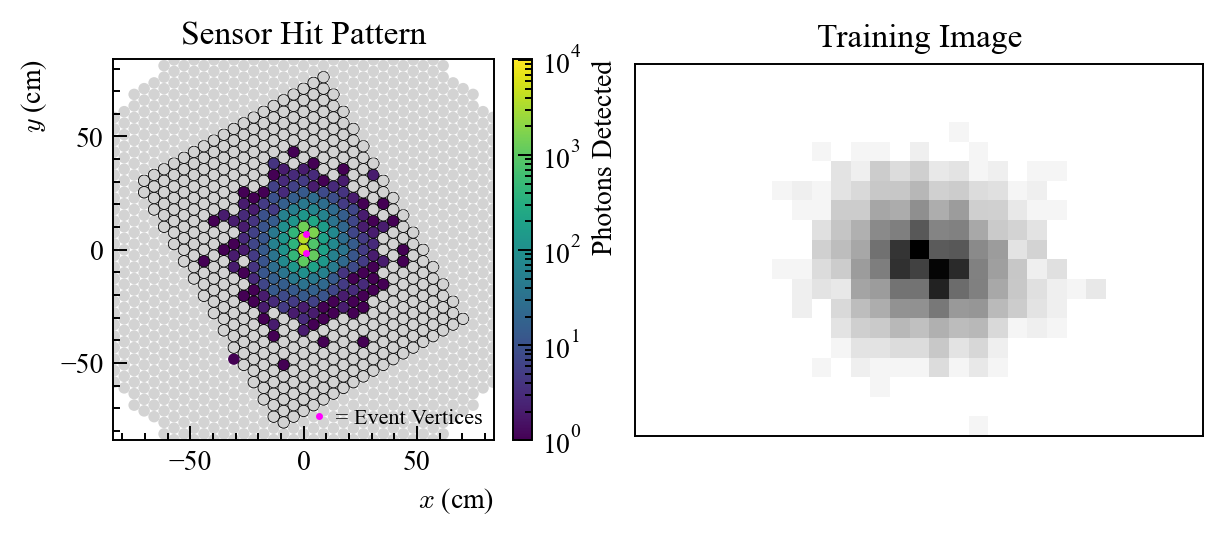

In [15]:
loaded = np.load('data/hit_pattern_data.npz')
det_counts_ms = loaded['det_counts_ms']
pmt_indices_ms = loaded['pmt_indices_ms']
pmt_pos_array = loaded['pmt_pos_array']
pmt_diam = loaded['pmt_diam']
radius_tpc = loaded['radius_tpc']
images_ms = loaded['images_ms']
event_ids_ms = loaded['event_ids_ms']
site1 = loaded['site1']
site2 = loaded['site2']

event_id = 5
ind = event_ids_ms[event_id]

fig, ax = plt.subplots(1, 2, figsize=(6, 2.75), layout='constrained', width_ratios=[0.67, 1])

cmap = plt.get_cmap('viridis').copy()
cmap.set_bad('lightgray')
norm = mcolors.LogNorm(vmin=1, vmax=np.amax(det_counts_ms))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

ax[0].set_xlim([-0.8*radius_tpc/10, 0.8*radius_tpc/10])
ax[0].set_ylim([-0.8*radius_tpc/10, 0.8*radius_tpc/10])
ax[0].set_aspect('equal')
ax[0].set_xlabel(r'$\it{x}$ (cm)')
ax[0].set_ylabel(r'$\it{y}$ (cm)')
ax[0].set_title('Sensor Hit Pattern')

cbar = fig.colorbar(sm, ax=ax[0], shrink=0.72, label='Photons Detected')

for pmt_i, _ in enumerate(pmt_pos_array):
    pos = pmt_pos_array[pmt_i]
    if pmt_i in pmt_indices_ms[event_id]:
        ec = 'k'
    else:
        ec = 'none'
    ax[0].add_artist(Circle(pos/10., pmt_diam/2./10., lw=0.3, ec=ec, fc=sm.to_rgba(det_counts_ms[event_id, pmt_i])))

ax[0].plot(*site1[ind]/10., marker='.', ls='none', color='magenta', label=' = Event Vertices')
ax[0].plot(*site2[ind]/10., marker='.', ls='none', color='magenta')
ax[0].legend(loc='lower right', handletextpad=0, handlelength=1., borderpad=0)

im = ax[1].imshow(images_ms[event_id].T, origin='lower', cmap='Greys', norm=mcolors.LogNorm())
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Training Image')
fig.savefig('figures/CNN_Image_Prep.pdf')